# A1: Car Price Prediction

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load Dataset

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
# Check for the first 5 rows of the dataset
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check for the column name information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
# Check for the briefly summary statistic
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check for the total number of rows and columns
df.shape

(8128, 13)

In [7]:
# Check for the unique name for each column
df.columns.unique()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [8]:
# Check for any missing value
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

## 2. Explanatory Data Analysis (EDA)

### Inspect `'Owner'`

In [9]:
# Check unique name in owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [10]:
# Map the 'First Owner' to 1, 'Second Owner' to 2, ... 'Test Drive Car' to 5
df['owner'].replace({
    'First Owner': 1,
    'Second Owner': 2,
    'Third Owner': 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car': 5},
    inplace=True)

# Check the unique name (alias) for the owner column
df['owner'].unique()

/tmp/ipykernel_74771/2060915520.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['owner'].replace({
/tmp/ipykernel_74771/2060915520.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['owner'].replace({


array([1, 2, 3, 4, 5])

In [11]:
# Check for the mean and median of selling type by each type of owner
print('-' * 110)
print('The mean of selling price for each owner')
print('Note: 1 is First Owner, 2 is Second Owner, 3 is Third Owner, 4 is Fourth & Above Owner, and 5 is Test Drive Car')
print('-' * 110)
print(df.groupby(['owner'])['selling_price'].mean().round())
print('-' * 110)
print('The median of selling price for each owner')
print('Note: 1 is First Owner, 2 is Second Owner, 3 is Third Owner, 4 is Fourth & Above Owner, and 5 is Test Drive Car')
print('-' * 110)
print(df.groupby(['owner'])['selling_price'].median().round())


--------------------------------------------------------------------------------------------------------------
The mean of selling price for each owner
Note: 1 is First Owner, 2 is Second Owner, 3 is Third Owner, 4 is Fourth & Above Owner, and 5 is Test Drive Car
--------------------------------------------------------------------------------------------------------------
owner
1     783086.0
2     392964.0
3     284015.0
4     225813.0
5    4403800.0
Name: selling_price, dtype: float64
--------------------------------------------------------------------------------------------------------------
The median of selling price for each owner
Note: 1 is First Owner, 2 is Second Owner, 3 is Third Owner, 4 is Fourth & Above Owner, and 5 is Test Drive Car
--------------------------------------------------------------------------------------------------------------
owner
1     550000.0
2     310000.0
3     225000.0
4     170000.0
5    5923000.0
Name: selling_price, dtype: float64


In [12]:
# Drop the 'Test Drive Car' due to over expensive
df = df[df['owner'] != 5].reset_index(drop=True)

# Check for the remaining unique alias from the 'owner' column 
df['owner'].unique()

array([1, 2, 3, 4])

Text(0.5, 0, 'Category of owner')

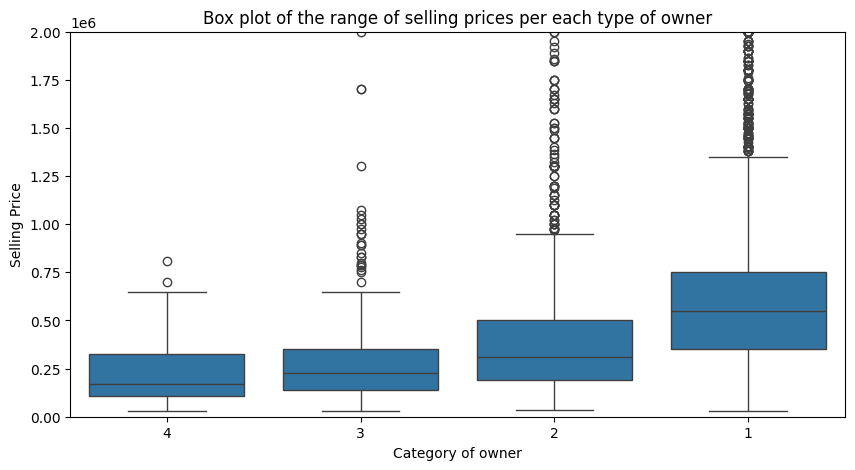

In [13]:
# Box plot of the range of selling prices per each type of owner
plt.figure(figsize=(10,5))

# Using median values and order each category of owner's selling price via ascending order 
idx_med = df.groupby(['owner'])['selling_price'].median().sort_values(ascending=True).index
sns.boxplot(data=df, x='owner', y='selling_price', order=idx_med, hue_order='owner')

plt.title('Box plot of the range of selling prices per each type of owner')
plt.ylim([0, 2000000])
plt.ylabel('Selling Price')
plt.xlabel('Category of owner')

##### The First Owner has the highest selling price followed by the Second Owner and so on

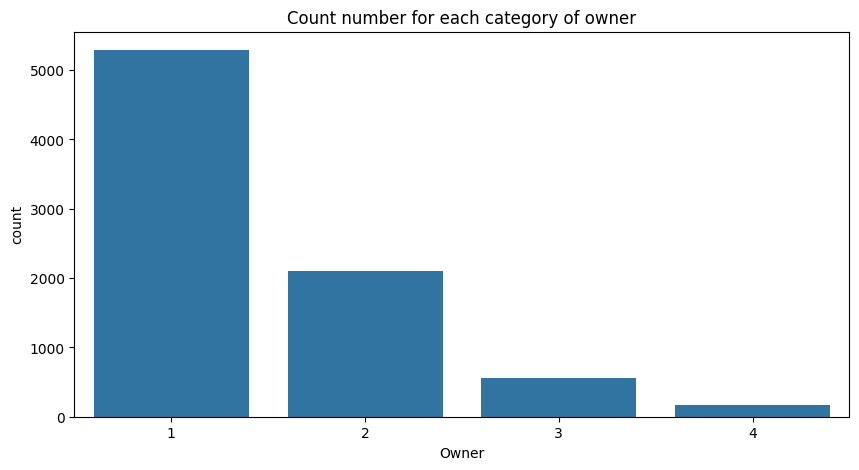

In [14]:
# Count number for each category of owner
plt.figure(figsize=(10,5))
idx_count = df['owner'].value_counts().index
sns.countplot(data=df, x = 'owner', order = idx_count)

plt.title('Count number for each category of owner')
plt.xlabel('Owner')
plt.show()

##### The First Owner has the most car sold recorded

### Inspect `'fuel'`

In [15]:
# Check unique name in fuel column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [16]:
# Remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol
to_remove = ['CNG', 'LPG']
df = df[~df['fuel'].isin(to_remove).reset_index(drop=True)]

# Check the alias name in 'fuel' column again
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [17]:
# Check selling price for each category of fuel 
print('-' * 48)
print('The mean of selling price for each fuel type')

print('-' * 48)
print(df.groupby(['fuel'])['selling_price'].mean().round())
print('-' * 48)
print('The median of selling price for each fuel type')

print('-' * 48)
print(df.groupby(['fuel'])['selling_price'].median().round())

------------------------------------------------
The mean of selling price for each fuel type
------------------------------------------------
fuel
Diesel    791326.0
Petrol    457252.0
Name: selling_price, dtype: float64
------------------------------------------------
The median of selling price for each fuel type
------------------------------------------------
fuel
Diesel    550000.0
Petrol    340000.0
Name: selling_price, dtype: float64


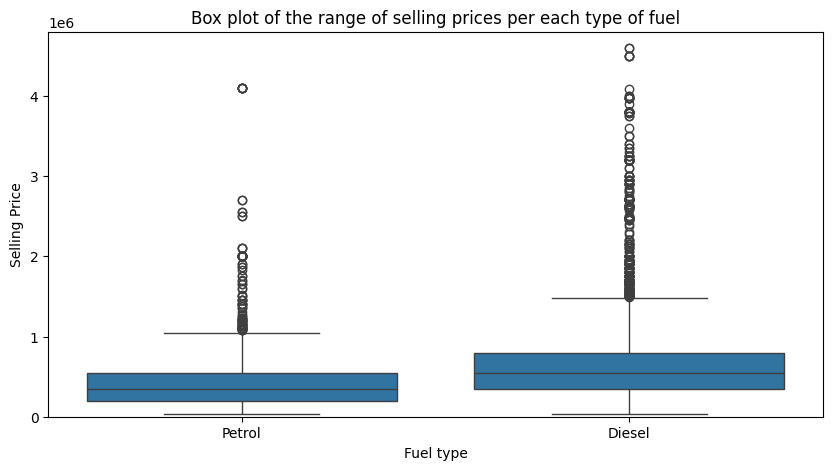

In [18]:
# Box plot of the range of selling prices per each type of fuel
plt.figure(figsize=(10,5))

# Order the median by ascending order
idx_med = df.groupby(['fuel'])['selling_price'].median().sort_values(ascending=True).index

# Plot the boxpllot to show the median with the inter quartile range
sns.boxplot(data=df, x='fuel', y='selling_price', order=idx_med)

plt.title('Box plot of the range of selling prices per each type of fuel')
plt.ylim(0, 4800000)
plt.xlabel('Fuel type')
plt.ylabel('Selling Price')
plt.show()

In [19]:
df.columns.unique()

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

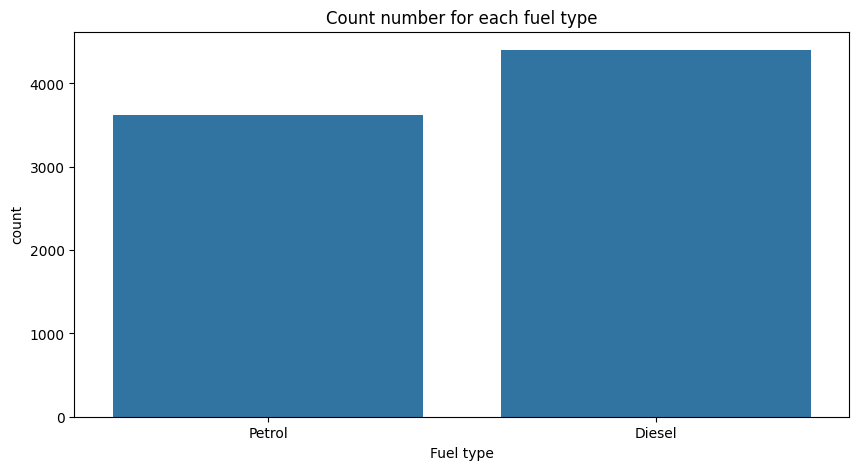

In [20]:
# Count number for each type of fuel
plt.figure(figsize=(10,5))

# Make the count method and sort it via ascending order
idx_count = df['fuel'].value_counts().sort_values(ascending=True).index

# Create countplot for counting
sns.countplot(data=df, x='fuel', order=idx_count)

plt.title('Count number for each fuel type')
plt.xlabel('Fuel type')
plt.show()

### Inspect `'mileage'`

##### Due to being measured as kmpl (Kilometer per liter), we will remane the `'mileage'` column to be `'fuel_eff'`

In [21]:
df.rename(columns={'mileage': 'fuel_eff'}, inplace=True)
# Split the float and str from 'fuel_eff' column
df['fuel_eff'] = df['fuel_eff'].str.split()

In [22]:
# Remove 'kmpl' from 'fuel_eff' column
df['fuel_eff'] = df['fuel_eff'].str[0].astype(float)

# # Can also use this code directly: Use .str.replace() method
# df['fuel_eff'] = df['fuel_eff'].str.replace(' kmpl', '').astype(float)

# # Check the alias value in 'fuel_eff' column again
df['fuel_eff'].head()


0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: fuel_eff, dtype: float64

The Distribution plot shows that the fuel_eff is normally distributed
Mean of the fuel_eff is: 19.391961863322244
Median of the fuel_eff is: 19.3


<Figure size 1000x500 with 0 Axes>

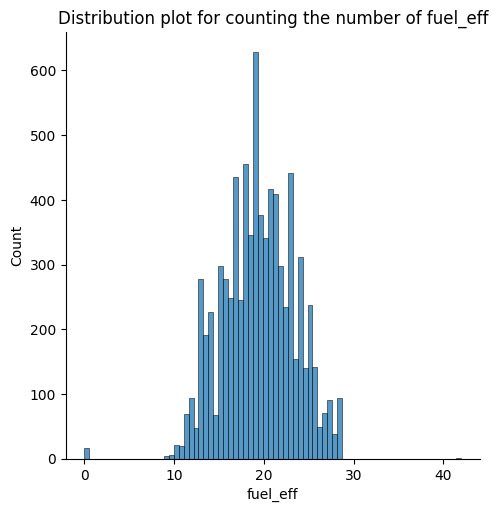

In [23]:
# Distribution plot of 'fuel_eff'
plt.figure(figsize=(10,5))
sns.displot(data=df,x='fuel_eff')

# Edit the labels
plt.title('Distribution plot for counting the number of fuel_eff')
plt.xlabel('fuel_eff')

# Summary for the graph details
print('The Distribution plot shows that the fuel_eff is normally distributed')
print(f"Mean of the fuel_eff is: {df['fuel_eff'].mean()}")
print(f"Median of the fuel_eff is: {df['fuel_eff'].median()}")

### Inspect `'km_driven'`

The Distribution plot informs that km_driven column is skewed to the right
The mean for the km_driven is: 69773.14025909317
The median for the km_driven is: 60000.0


<Figure size 1000x500 with 0 Axes>

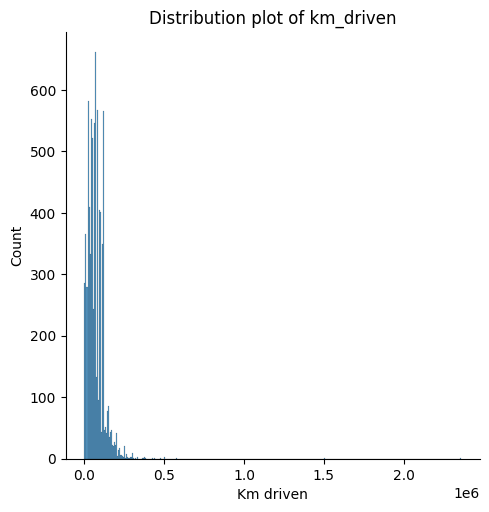

In [24]:
# Distribution plot of km_driven
plt.figure(figsize=(10,5))
sns.displot(data=df,x='km_driven')

# Adjust the labels
plt.title('Distribution plot of km_driven')
plt.xlabel('Km driven')

# Summary for the graph details
print('The Distribution plot informs that km_driven column is skewed to the right')
print(f"The mean for the km_driven is: {df['km_driven'].mean()}")
print(f"The median for the km_driven is: {df['km_driven'].median()}")

### Inspect `'engine'`

In [25]:
# Check alias name in engine column
df['engine'].unique()

print(f"Due to \'CC\' is attached, we can't convert the values to be int for example: {df['engine'][33]}")
print(f"We need to remove \'CC\' to be able to make further statistical analization...")

Due to 'CC' is attached, we can't convert the values to be int for example: 1197 CC
We need to remove 'CC' to be able to make further statistical analization...


In [26]:
# Remove 'CC' from 'engine' column
df['engine'] = df['engine'].str.replace(' CC', '').astype(float)

# Check the values in engine column again
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

The distribution plot shows that the engine is skewed to the right
Mean of the engine is: 1462.9146403890454
Median of the engine is: 1248.0


<Figure size 1000x500 with 0 Axes>

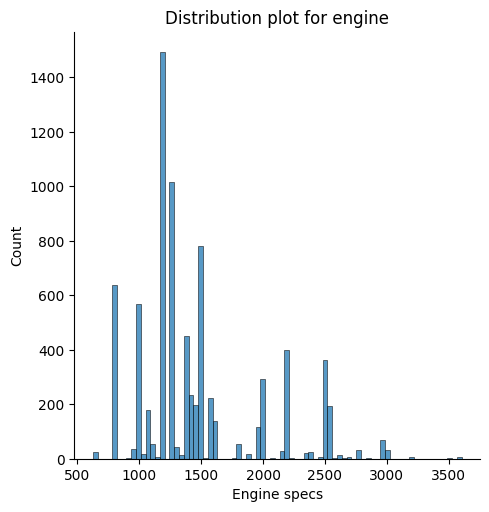

In [27]:
# Distribution plot for 'engine' column
plt.figure(figsize=(10,5))
sns.displot(data=df,x='engine')

# Edit the labels
plt.title('Distribution plot for engine')
plt.xlabel('Engine specs')

# Summary for the graph details
print('The distribution plot shows that the engine is skewed to the right')
print(f"Mean of the engine is: {df['engine'].mean()}")
print(f"Median of the engine is: {df['engine'].median()}")

### Inspect `'max_power'`

In [28]:
# Check the alias name values in 'max_power' column
df['max_power'].unique()

print(f"Due to \'bhp\' is attached, we can't convert the values to be int for example: {df['max_power'][33]}")
print(f"We need to remove \'bhp\' to be able to make further statistical analization...")

Due to 'bhp' is attached, we can't convert the values to be int for example: 81.83 bhp
We need to remove 'bhp' to be able to make further statistical analization...


In [29]:
# Remove 'bhp' from 'engine' column
df['max_power'] = df['max_power'].str.replace(' bhp', '').astype(float)

# Check the values in engine column again
df['max_power'].head()

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

The distribution plot shows that the max power is skewed to the right
Mean of the max power is: 91.8197257033248
Median of the max power is: 82.4


<Figure size 1000x500 with 0 Axes>

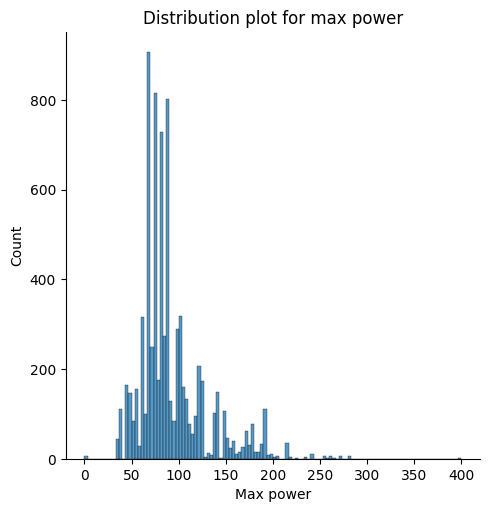

In [30]:
# Distribution plot of 'max_power' 
plt.figure(figsize=(10,5))
sns.displot(data=df,x='max_power')

# Edit the labels
plt.title('Distribution plot for max power')
plt.xlabel('Max power')

# Summary for the graph details
print('The distribution plot shows that the max power is skewed to the right')
print(f"Mean of the max power is: {df['max_power'].mean()}")
print(f"Median of the max power is: {df['max_power'].median()}")

### Inspect `'name'`

In [31]:
# Check for the alias values in 'name' column
df['name'].unique()

# Keep only the first brand name and remove the rest
df['name'] = df['name'].str.split().str[0]

# Change the name of the column from 'name' to 'brand' for easier read
df.rename(columns={'name': 'brand'}, inplace=True)

# Check the alias name in 'name' column again
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [32]:
# Check for missing value in brand column
print(df['brand'].isna().sum())
print(df['brand'].unique())

0
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [33]:
# Since brand consists of many name, we will group then into each region they came from instead
# Group brand regions
brand_regions = {
    'Ashok': 'Asia',
    'Audi': 'Europe',
    'BMW': 'Europe',
    'Chevrolet': 'America',
    'Daewoo': 'Asia',
    'Datsun': 'Asia',
    'Fiat': 'Europe',
    'Force': 'Asia',
    'Ford': 'America',
    'Honda': 'Asia',
    'Hyundai': 'Asia',
    'Isuzu': 'Asia',
    'Jaguar': 'Europe',
    'Jeep': 'America',
    'Kia': 'Asia',
    'Land': 'Europe',
    'Lexus': 'Asia',
    'MG': 'Asia',
    'Mahindra': 'Asia',
    'Maruti': 'Asia',
    'Mercedes-Benz': 'Europe',
    'Mitsubishi': 'Asia',
    'Nissan': 'Asia',
    'Opel': 'Europe',
    'Peugeot': 'Europe',
    'Renault': 'Europe',
    'Skoda': 'Europe',
    'Tata': 'Asia',
    'Toyota': 'Asia',
    'Volkswagen': 'Europe',
    'Volvo': 'Europe',
    'Ambassador': 'Europe'
}

In [34]:
# Map Brands to Regions: Replace the brand column with its corresponding region
df['brand_region'] = df['brand'].map(brand_regions)

In [35]:
# Identify unmapped brands
unmapped_brands = df.loc[df['brand_region'].isna(), 'brand'].unique()
print("Unmapped Brands:", unmapped_brands)


Unmapped Brands: []


In [36]:
df['brand_region'].value_counts()

brand_region
Asia       6446
Europe      926
America     656
Name: count, dtype: int64

In [37]:
# Check the mean and the median for the brand_regiosn name  
print('-' * 48)
print('The mean of brand_region name for each brand_region')

print('-' * 48)
print(df.groupby(['brand_region'])['selling_price'].mean().round())
print('-' * 48)
print('The median of selling price for each brand_region')

print('-' * 48)
print(df.groupby(['brand_region'])['selling_price'].median().round())

------------------------------------------------
The mean of brand_region name for each brand_region
------------------------------------------------
brand_region
America     509681.0
Asia        522989.0
Europe     1550259.0
Name: selling_price, dtype: float64
------------------------------------------------
The median of selling price for each brand_region
------------------------------------------------
brand_region
America    350000.0
Asia       450000.0
Europe     645000.0
Name: selling_price, dtype: float64


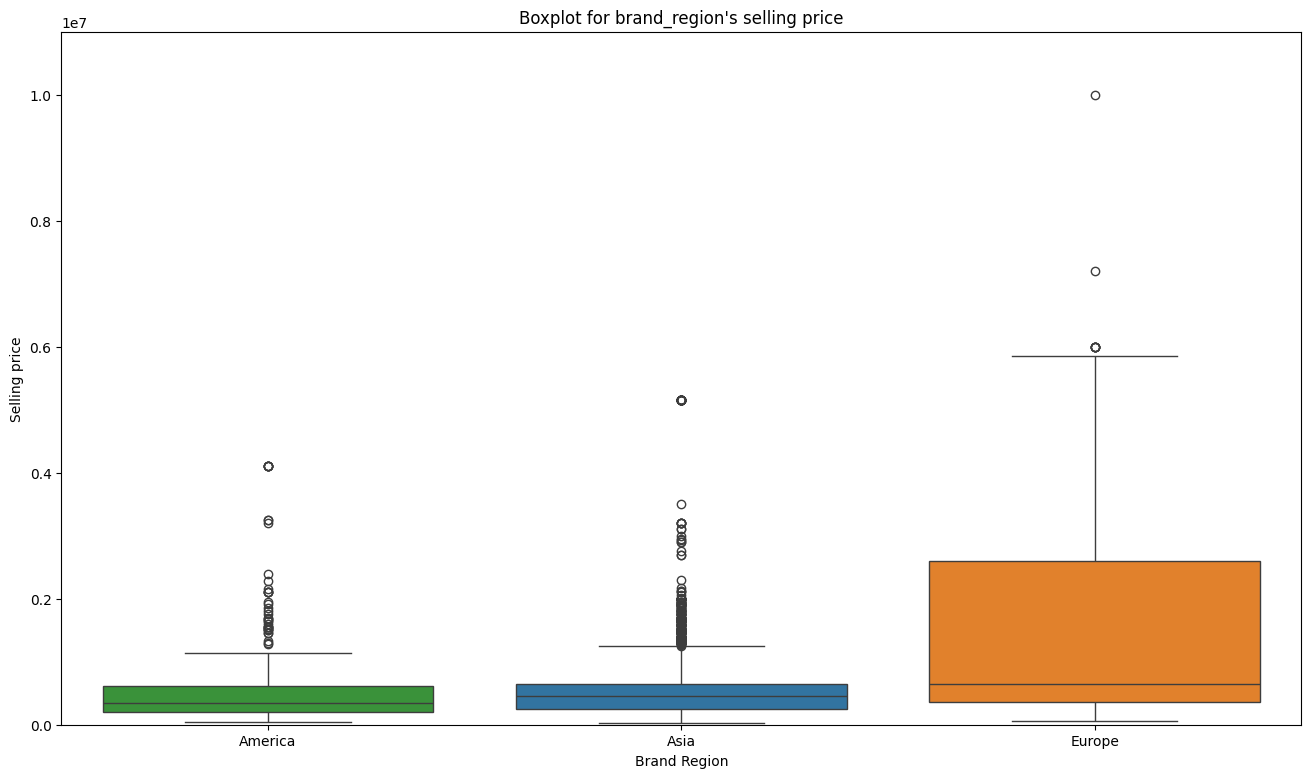

Each car brand_region has variety of the price differentation.
Hence, the selling price can be varied based on each brand region.
We can make a prediction about the selling price by analyzing the brand region.


In [38]:
# Boxplot fot selling price visulization for brand_region
plt.figure(figsize=(16,9))

# Define order variable 
# Using median value to order each brand_region's selling price via ascending order 
idx_med = df.groupby(['brand_region'])['selling_price'].median().sort_values(ascending=True).index

# Plot the boxplot
sns.boxplot(data=df, x='brand_region', y='selling_price', order=idx_med, hue='brand_region')

# Adjust labels
plt.title('Boxplot for brand_region\'s selling price')
plt.xlabel('Brand Region')
plt.ylim(0, 11000000)
plt.ylabel('Selling price')
plt.show()

print('Each car brand_region has variety of the price differentation.')
print('Hence, the selling price can be varied based on each brand region.')
print('We can make a prediction about the selling price by analyzing the brand region.')

The distribution plot shows that the brand region is skewed to the right


<Figure size 1000x500 with 0 Axes>

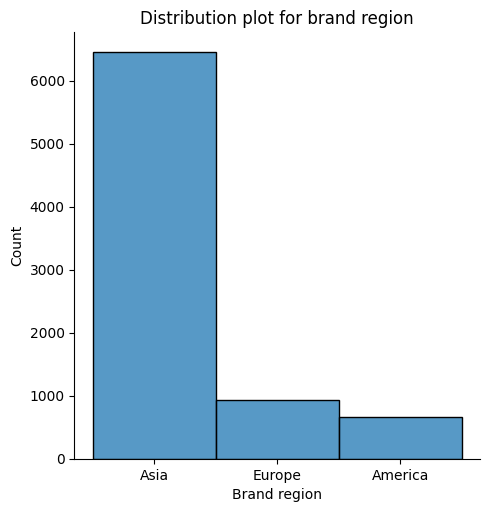

In [39]:
# Distribution plot of 'brand_region' 
plt.figure(figsize=(10,5))
sns.displot(data=df,x='brand_region')

# Edit the labels
plt.title('Distribution plot for brand region')
plt.xlabel('Brand region')

# Summary for the graph details
print('The distribution plot shows that the brand region is skewed to the right')

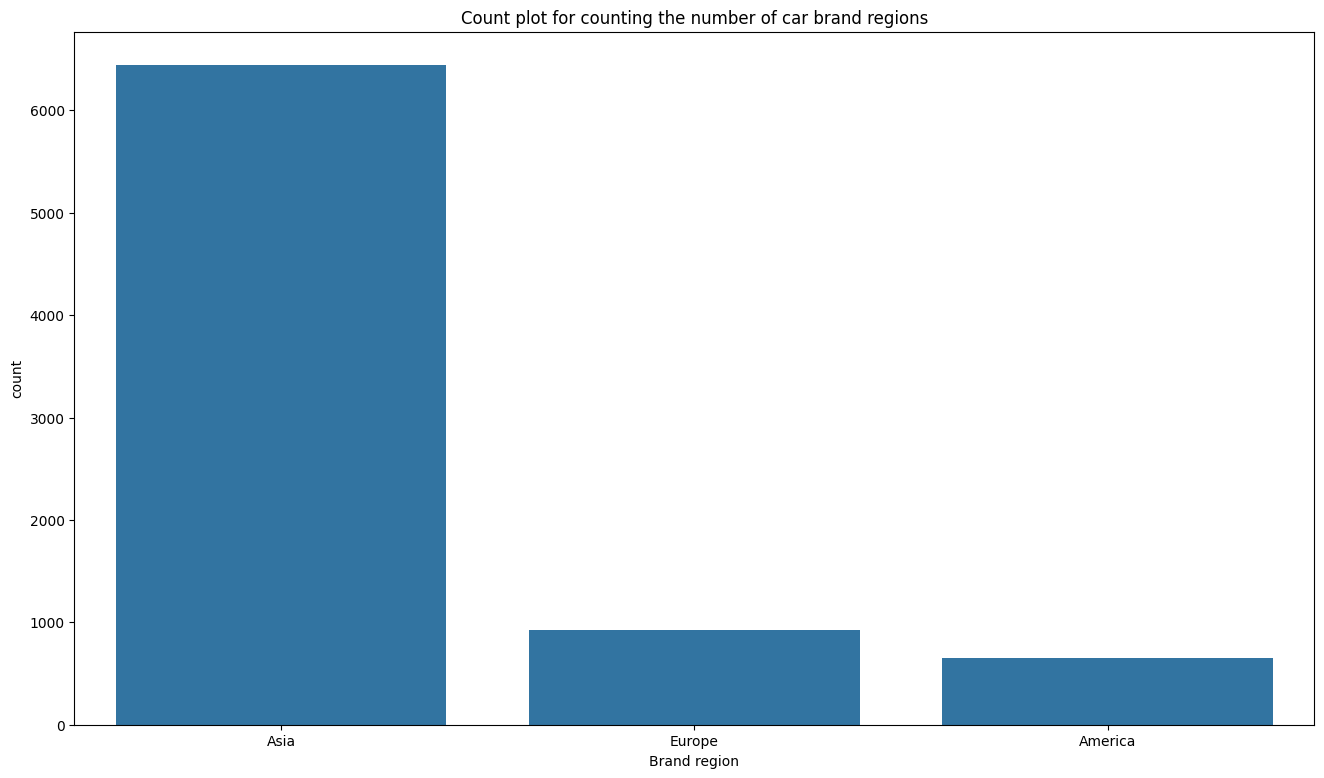

In [40]:
# Count number of each car brand region
plt.figure(figsize=(16,9))

# Filter and order count for each brand region
idx_count = df['brand_region'].value_counts().index
sns.countplot(data=df, x = 'brand_region', order = idx_count)

# Edit the labels
plt.title('Count plot for counting the number of car brand regions')
plt.xlabel('Brand region')
plt.show()


### Inspect `'torque'`

In [41]:
# Check the unique values in 'torque' column
df['torque'].unique()

# Due to the confusion for the data entries, we decided to drop the 'torque' column
df.drop('torque', axis=1, inplace=True)

### Inspect `'seats'`

In [42]:
# Check the unique values in 'seats' column
df['seats'].unique()

array([ 5.,  4., nan,  7.,  8.,  6.,  9., 10., 14.,  2.])

In [43]:
# Check for the mean and median of selling type by each seats category
print('-' * 53)
print('The mean of selling price for each seats category')
print('-' * 53)
print(df.groupby(['seats'])['selling_price'].mean().round())
print('-' * 53)
print('The median of selling price for each seats category')
print('-' * 53)
print(df.groupby(['seats'])['selling_price'].median().round())

-----------------------------------------------------
The mean of selling price for each seats category
-----------------------------------------------------
seats
2.0     700500.0
4.0     491393.0
5.0     631792.0
6.0     581597.0
7.0     813163.0
8.0     585855.0
9.0     500075.0
10.0    344105.0
14.0    235000.0
Name: selling_price, dtype: float64
-----------------------------------------------------
The median of selling price for each seats category
-----------------------------------------------------
seats
2.0     700500.0
4.0      65000.0
5.0     425000.0
6.0     500000.0
7.0     690000.0
8.0     500000.0
9.0     500000.0
10.0    295000.0
14.0    235000.0
Name: selling_price, dtype: float64


Text(0.5, 0, 'Seats')

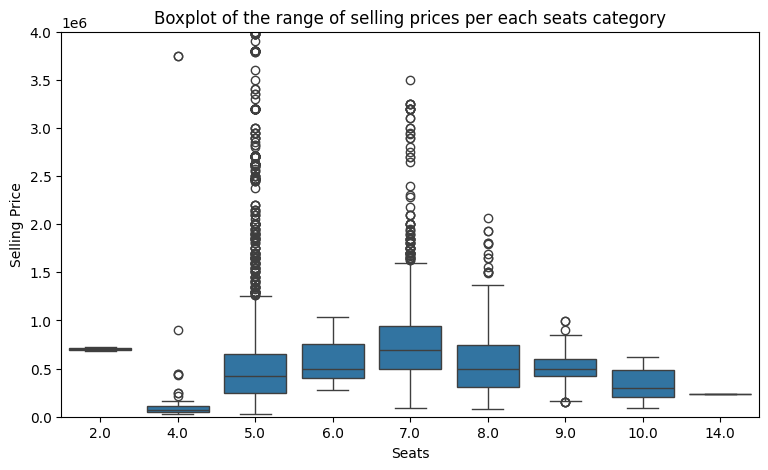

In [44]:
# Boxplot of the range of selling prices per each seats category
plt.figure(figsize=(9,5))

# Boxplot 'seat' column from the dataframe
sns.boxplot(data=df, x='seats', y='selling_price')

plt.title('Boxplot of the range of selling prices per each seats category')
plt.ylim([0, 4000000])
plt.ylabel('Selling Price')
plt.xlabel('Seats')

Text(0.5, 0, 'Seats')

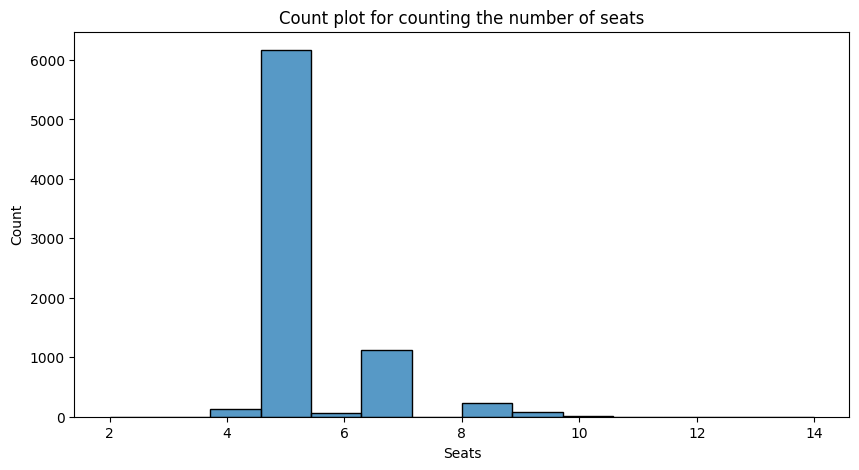

In [45]:
# Count plot for 'seats' column
plt.figure(figsize=(10,5))
sns.histplot(data=df,x='seats')

# Edit the labels
plt.title('Count plot for counting the number of seats')
plt.xlabel('Seats')

### The `cleaned data` visualization

In [46]:
# Print description of the output
print('This is the cleaned data of Chaky car company: ')

# Check the dataframe again
df.head()
df.isna().sum()

This is the cleaned data of Chaky car company: 


brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
fuel_eff         214
engine           214
max_power        208
seats            214
brand_region       0
dtype: int64

### Label and One-Hot Encoding

##### Check all the `unique values` for each column

In [47]:
# 'brand'
df['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [48]:
# 'fuel'
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [49]:
# 'transmission'
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [50]:
# 'seller_type'
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

#### `Label` encoding

In [51]:
# We found out that 'fuel' and 'transmission' columns have only two unique values
# Thus, these columns can be label-encoded
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'fuel'
fuel_le = LabelEncoder()
df['fuel'] = fuel_le.fit_transform(df['fuel'])

# Label encoding for 'transmission'
transmission_le = LabelEncoder()
df['transmission'] = transmission_le.fit_transform(df['transmission'])

df.isna().sum()


brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
fuel_eff         214
engine           214
max_power        208
seats            214
brand_region       0
dtype: int64

#### `One-Hot` encoding

In [52]:
# We found out that 'brand' and 'seller_type' columns have only two unique values
# One-Hot encoding using OneHotEncoder of Scikit-Learn
from sklearn.preprocessing import OneHotEncoder

# Function for one-hot encoding
def one_hot_transform(encoder, dataframe, feature):
    # Perform encoding
    encoded = encoder.transform(dataframe[[feature]])
    
    # Convert to DataFrame
    feature_df = pd.DataFrame(encoded, 
                              columns=encoder.get_feature_names_out([feature]))
    
    # Add the new columns to the DataFrame and drop the original feature column
    concat_dataframe = dataframe.join(feature_df).drop(columns=[feature])
    
    return concat_dataframe

# Fit the encoders
brandre_ohe = OneHotEncoder(sparse_output=False).fit(df[['brand_region']])
seller_type_ohe = OneHotEncoder(sparse_output=False).fit(df[['seller_type']])

# Apply one-hot encoding
df = one_hot_transform(brandre_ohe, df, 'brand_region')
df = one_hot_transform(seller_type_ohe, df, 'seller_type')

# Excluding one-hot encoded features
selected_cols = ['year', 'selling_price', 'km_driven', 'fuel', 
                 'transmission', 'owner', 'fuel_eff', 'engine', 
                 'max_power', 'seats']
dfcopy = df[selected_cols]

### Correlation Matrics

- Correlation Matric: Find out the highly correlated features with the selling prices (relavant independent features)

<Axes: >

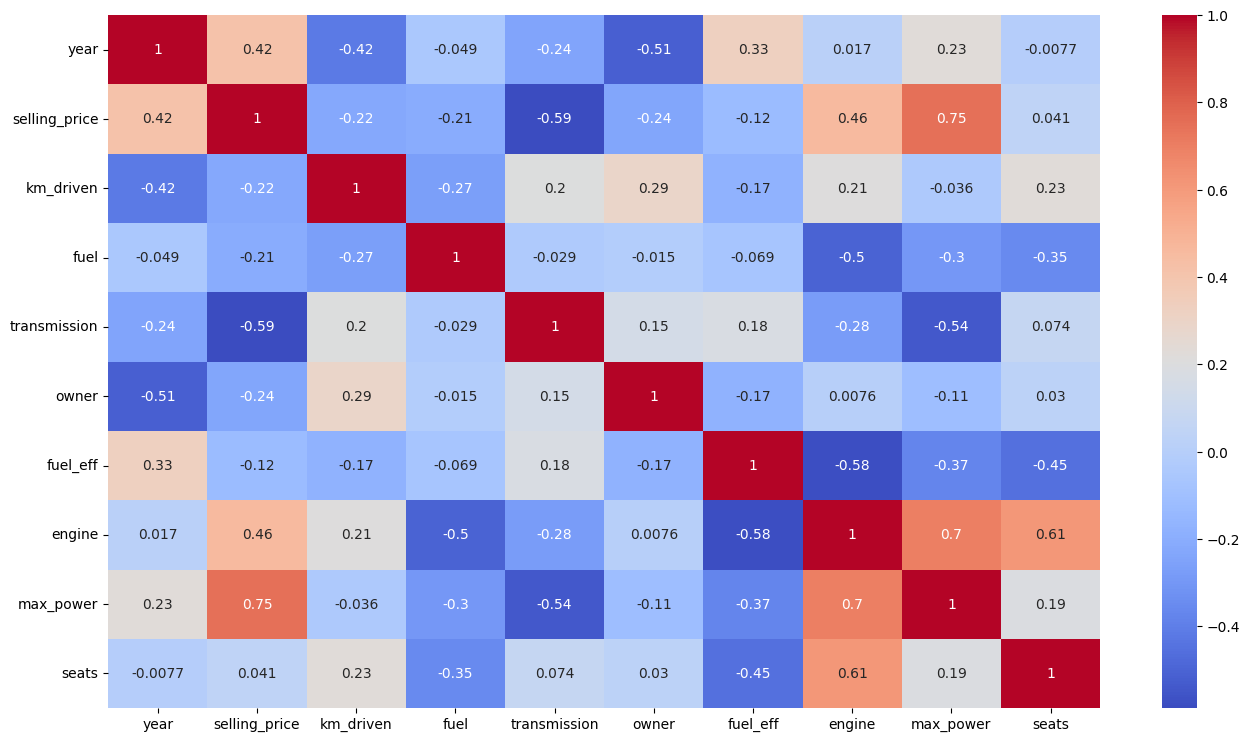

In [53]:
# Using heatmap to display the correlation matrix
plt.figure(figsize=(16,9))
sns.heatmap(dfcopy.corr(numeric_only=True), annot=True, cmap='coolwarm')

### Predictive Power Matric

- Unlike correlation metric, which works with linear relationships mesurement only, a predictive power metric can detect non-linear patterns in the data. 

In [54]:
import ppscore as pps

plt.figure(figsize=(16,9))
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

ModuleNotFoundError: No module named 'ppscore'

## 3. Feature selection

### Choose the Most Salient `Features (x)`:
- Rule of Thumb: Good features MUST NOT BE correlated, i.e., independent.
- When features are highly correlated like `'max_power'` and `'engine'` 
    - Due to redundant information, we will choose only one of them
- Rule of Thumb: Correlation is not causation; don’t pick features using correlation only—it should make sense!
    - We must ensure that all of the features are logically correlated with the `target variable` 
    - Only choose features that could make sense
    - Features like `'year'` (age of the car) and `'km_driven'` (distance traveled) make logical sense in predicting `'selling_price'`, even if their correlation is moderate.
- Since each of `'brand_region'` has the significant difference in the `'selling_price'`
    - This feature can be reliable when it comes to different origin of region that each car brand came from

### Spicify the `target variable (y)`:
- Keep `'selling_price'` to be consistent throughout the analysis

##### `Features` and `target variable` selection

- Rule of thumb: `Always split BEFORE preprocessing`, to prevent data leakage
    - Can be done in this order: (1) splitting, (2) imputation, (3) scaling

In [55]:
# Check the number of features
print(df.columns.shape)

# Check the number of samples
print(df.index.shape)

(17,)
(8028,)


In [57]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split

brand_region_cats = list(brandre_ohe.get_feature_names_out(['brand_region']))
selected_cols = ['max_power', 'year', 'km_driven', 'fuel_eff'] + brand_region_cats

# Choosing the most salient features (x)
x = df[selected_cols]

# Choose the target variable (y)
y = np.log(df['selling_price'])

# Split the train and test dataset for 8:2 proportion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [59]:
# Check shapes for verification
print('-'* 43)
print('Notation for the rows and columns (m, n)')
print('-'* 43)
print(f"Training features shape:, {x_train.shape} (m, n)")
print(f"Testing features shape:, {x_test.shape} (m, n)")
print(f"Target training shape:, {y_train.shape} (m, n)")
print(f"Target testing shape:, {y_test.shape} (m, n)")

-------------------------------------------
Notation for the rows and columns (m, n)
-------------------------------------------
Training features shape:, (6422, 7) (m, n)
Testing features shape:, (1606, 7) (m, n)
Target training shape:, (6422,) (m, n)
Target testing shape:, (1606,) (m, n)


## 4. Preprocessing

#### Check for `NaN` value on the `selected features`

In [60]:
NaN_x_train = x_train.isna().sum()

# Filter for the feature that has missing value to be more than 0
print(f"The missing value for each feature: \n{NaN_x_train[NaN_x_train > 0]}")

The missing value for each feature: 
max_power               165
fuel_eff                171
brand_region_America     78
brand_region_Asia        78
brand_region_Europe      78
dtype: int64


### Using imputation by whether mean or median to fill the missing value

- Since the columns of brand_region are one_hot encoded and the brand_region_America is likely to be the NaN value of both Asia and Europe region
- We can replace the missing value of Asia and Europe region to 0, indicating the upsent of those 2 regions are America region
- Afterward, create a new column for brand_region_America and set its value to 1 for rows where both Asia and Europe columns have 0.

#### `'Brand region'`

In [61]:
# Fill missing values with 0 for Asia, Europe, and America (x_train)
x_train['brand_region_Asia'] = x_train['brand_region_Asia'].fillna(0)
x_train['brand_region_Europe'] = x_train['brand_region_Europe'].fillna(0)
x_train['brand_region_America'] = x_train['brand_region_America'].fillna(0)

In [62]:
# Fill missing values with 0 for Asia, Europe, and America  (x_test)
x_test['brand_region_Asia'] = x_test['brand_region_Asia'].fillna(0)
x_test['brand_region_Europe'] = x_test['brand_region_Europe'].fillna(0)
x_test['brand_region_America'] = x_test['brand_region_America'].fillna(0)

In [63]:
# Verify that each row belongs to exactly one region
region_check = x_train[['brand_region_Asia', 'brand_region_Europe', 'brand_region_America']].sum(axis=1)
print(region_check.unique())  

[1. 0.]


#### `'Year'`

Due to being left-skewed, we will imputate the missing value with median
Since 'year' feature doesn't contain any missing value, we will take no action for the imputation
Year's median: 2015.0


<Figure size 1600x900 with 0 Axes>

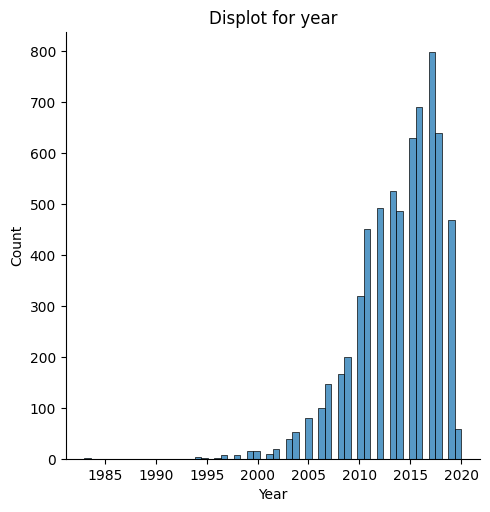

In [64]:
# Check distribution for 'year'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='year')
plt.title('Displot for year')
plt.xlabel('Year')

print('Due to being left-skewed, we will imputate the missing value with median')
print('Since \'year\' feature doesn\'t contain any missing value, we will take no action for the imputation')
print(f"Year's median: {x_train['year'].median()}")

plt.show()

#### `'max_power'`

Due to being right-skewed, we will imputate the missing value with median
Max power's median: 82.85


<Figure size 1600x900 with 0 Axes>

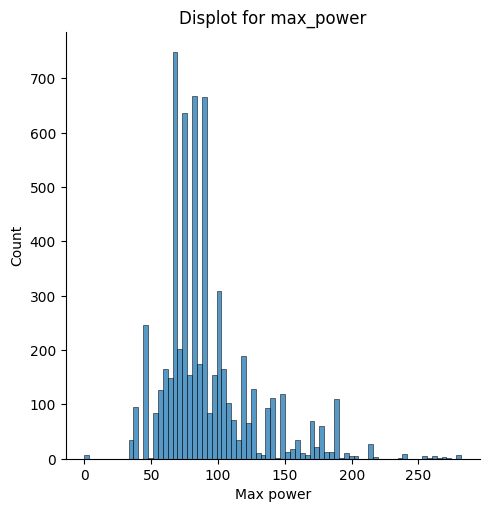

In [65]:
# Check the distribution for 'max_power'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='max_power')
plt.title('Displot for max_power')
plt.xlabel('Max power')

print('Due to being right-skewed, we will imputate the missing value with median')
print(f"Max power's median: {x_train['max_power'].median()}")

plt.show()

In [66]:
# Imputation of 'max_power' for x_train
x_train['max_power'] = x_train['max_power'].fillna(x_train['max_power'].median())

# Check for the missing value again
x_train['max_power'].isna().sum()

np.int64(0)

In [67]:
# Imputation of 'max_power' for x_test -> Using the median value from the x_train to prevent data leak
x_test['max_power'] = x_test['max_power'].fillna(x_train['max_power'].median())

# Check for the missing value again
x_test['max_power'].isna().sum()

np.int64(0)

#### `'fuel_eff'`

Due to being left-skewed, we will imputate the missing value with median
Fuel eff's median: 19.3


<Figure size 1600x900 with 0 Axes>

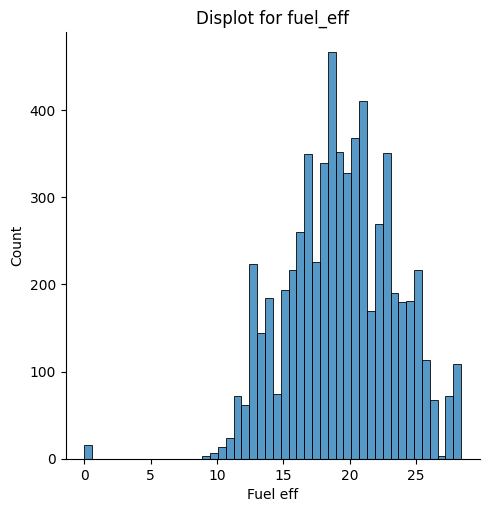

In [68]:
# Check the distribution for 'fuel_eff'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='fuel_eff')
plt.title('Displot for fuel_eff')
plt.xlabel('Fuel eff')

print('Due to being left-skewed, we will imputate the missing value with median')
print(f"Fuel eff's median: {x_train['fuel_eff'].median()}")

plt.show()

In [69]:
# Imputation of 'fuel_eff'
x_train['fuel_eff'] = x_train['fuel_eff'].fillna(x_train['fuel_eff'].median())

# Check for the missing value again
x_train['fuel_eff'].isna().sum()

np.int64(0)

In [70]:
# Imputation of 'fuel_eff' for x_test -> Using the median value from the x_train to prevent data leak
x_test['fuel_eff'] = x_test['fuel_eff'].fillna(x_train['fuel_eff'].median())

# Check for the missing value again
x_test['fuel_eff'].isna().sum()

np.int64(0)

In [71]:
# Check for missing value of y_train
y_train.isna().sum()

np.int64(0)

In [72]:
# Check for missing value of y_test
y_test.isna().sum()

np.int64(0)

### Removing outliners

##### `'max_power'`

- `Rule of thumb`: Don’t just delete using box plot rule. `Use your common sense` to understand what is possible, errors, and impossible


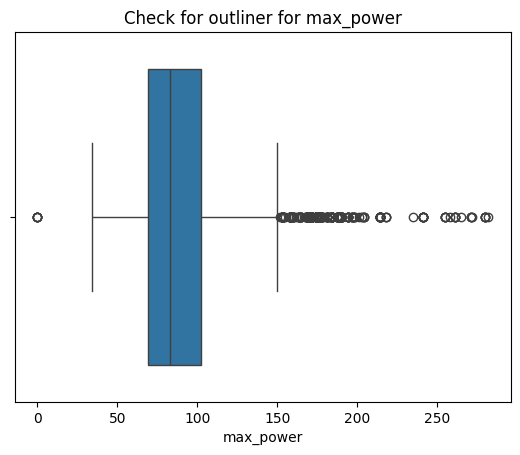

In [74]:
# Check for outliner for 'max_power'
sns.boxplot(data=x_train, x='max_power')
plt.title('Check for outliner for max_power')
plt.show()

- Widening the range to account for potential outliers that are not too extreme for `'max_power'`
    - The range multiplier is increased from 1.5 to 1.7

In [75]:
# Identify outliner thresholds for 'max_power' 
# Calculate IQR for max_power
Q1_fuel = x_train['max_power'].quantile(0.25)
Q3_fuel = x_train['max_power'].quantile(0.75)
IQR_fuel = Q3_fuel - Q1_fuel
lower_bound_fuel = Q1_fuel - 1.7 * IQR_fuel
upper_bound_fuel = Q3_fuel + 1.7 * IQR_fuel

In [76]:
# Cap outliner: Replace extreme values with the nearest threshold (clipping)
x_train['max_power'] = x_train['max_power'].clip(lower=lower_bound_fuel, upper=upper_bound_fuel)

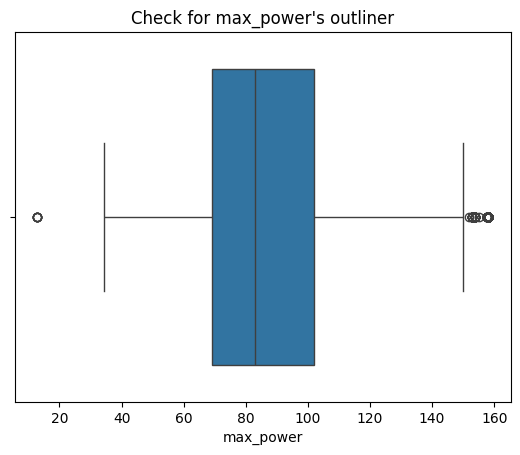

In [77]:
# Plot 'max_power' again to verify
sns.boxplot(x=x_train['max_power'])
plt.title('Check for max_power\'s outliner')
plt.show()

##### `'km_driven'`

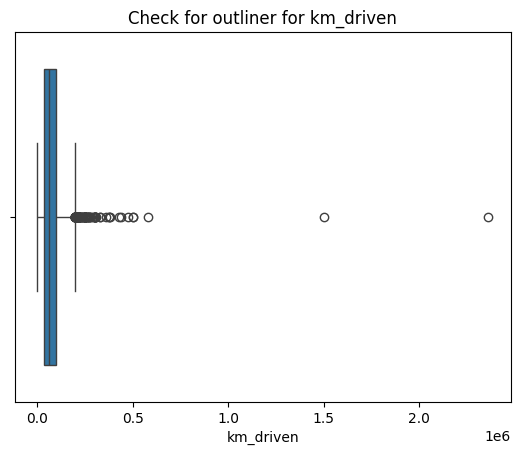

In [78]:
# Check for outliner for 'km_driven'
sns.boxplot(data=x_train, x='km_driven')
plt.title('Check for outliner for km_driven')
plt.show()

In [79]:
# Identify outliner thresholds for 'km_driven' 
# Calculate IQR for km_driven
Q1_fuel = x_train['km_driven'].quantile(0.25)
Q3_fuel = x_train['km_driven'].quantile(0.75)
IQR_fuel = Q3_fuel - Q1_fuel
lower_bound_fuel = Q1_fuel - 1.5 * IQR_fuel
upper_bound_fuel = Q3_fuel + 1.5 * IQR_fuel

In [80]:
# Cap outliner: Replace extreme values with the nearest threshold (clipping)
x_train['km_driven'] = x_train['km_driven'].clip(lower=lower_bound_fuel, upper=upper_bound_fuel)

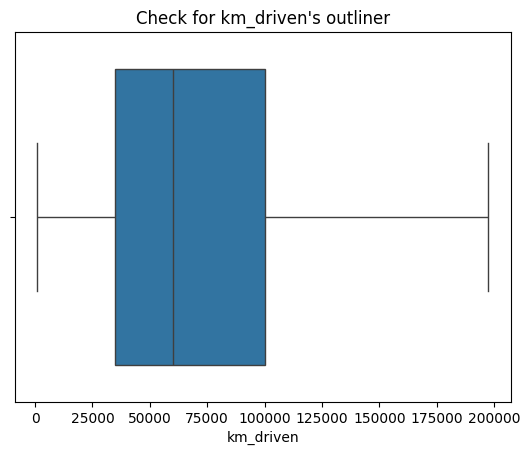

In [81]:
# Plot 'km_driven' again to verify
sns.boxplot(x=x_train['km_driven'])
plt.title('Check for km_driven\'s outliner')
plt.show()

##### `'fuel_eff'`

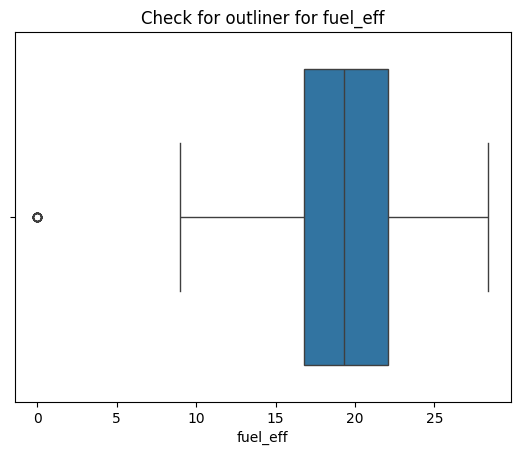

In [82]:
# Check for outliner for fuel_eff
sns.boxplot(data=x_train, x='fuel_eff')
plt.title('Check for outliner for fuel_eff')
plt.show()


In [83]:
# Identify outliner thresholds for 'fuel_eff' 
# Calculate IQR for fuel_eff
Q1_fuel = x_train['fuel_eff'].quantile(0.25)
Q3_fuel = x_train['fuel_eff'].quantile(0.75)
IQR_fuel = Q3_fuel - Q1_fuel
lower_bound_fuel = Q1_fuel - 1.5 * IQR_fuel
upper_bound_fuel = Q3_fuel + 1.5 * IQR_fuel

In [84]:
# Cap outliner: Replace extreme values with the nearest threshold (clipping)
x_train['fuel_eff'] = x_train['fuel_eff'].clip(lower=lower_bound_fuel, upper=upper_bound_fuel)

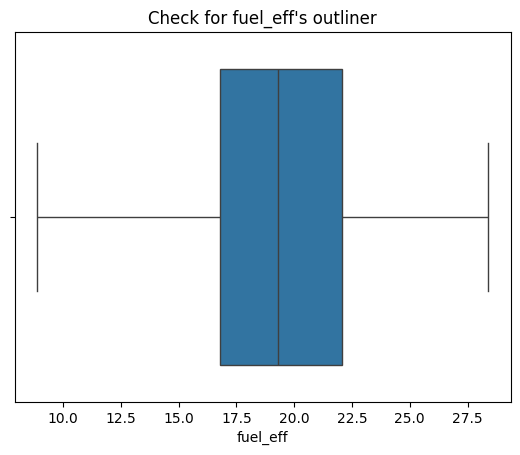

In [85]:
# Plot 'fuel_eff' again to verify
sns.boxplot(x=x_train['fuel_eff'])
plt.title('Check for fuel_eff\'s outliner')
plt.show()

##### `'year'`

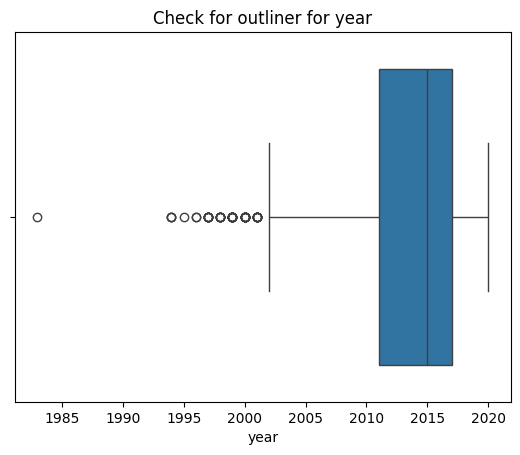

In [86]:
# Check for outliner for 'year'
sns.boxplot(data=x_train, x='year')
plt.title('Check for outliner for year')

plt.show()

In [87]:
# Calculate IQR for year
Q1_year = x_train['year'].quantile(0.25)
Q3_year = x_train['year'].quantile(0.75)
IQR_year = Q3_year - Q1_year
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year

In [88]:
# Cap outliner: Replace extreme values with the nearest threshold (clipping)
x_train['year'] = x_train['year'].clip(lower=lower_bound_year, upper=upper_bound_year)


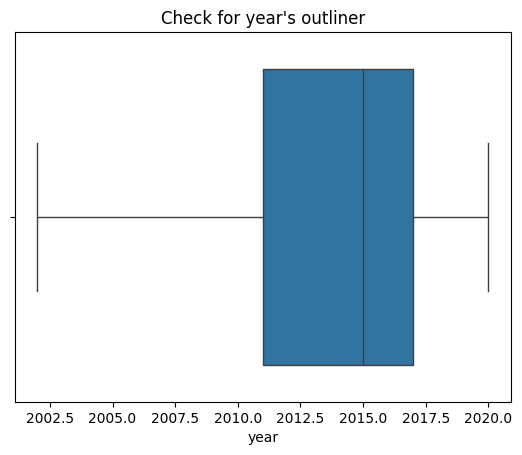

In [89]:
# Plot 'year' again to verify
sns.boxplot(x=x_train['year'])
plt.title('Check for year\'s outliner')
plt.show()

##### Verify transformation

In [91]:
# Verify transformation: Check that the outliners are handled and values are transformed apporiately
print(x_train[['max_power', 'km_driven', 'fuel_eff', 'year']].describe())

         max_power      km_driven     fuel_eff         year
count  6422.000000    6422.000000  6422.000000  6422.000000
mean     89.648469   68581.970414    19.403038  2013.852071
std      29.627222   43948.698613     3.883375     3.922459
min      12.900000    1000.000000     8.895000  2002.000000
25%      69.000000   35000.000000    16.800000  2011.000000
50%      82.850000   60000.000000    19.300000  2015.000000
75%     102.000000  100000.000000    22.070000  2017.000000
max     158.100000  197500.000000    28.400000  2020.000000


### Scaling

#### `'fuel_eff'`

<Figure size 1600x900 with 0 Axes>

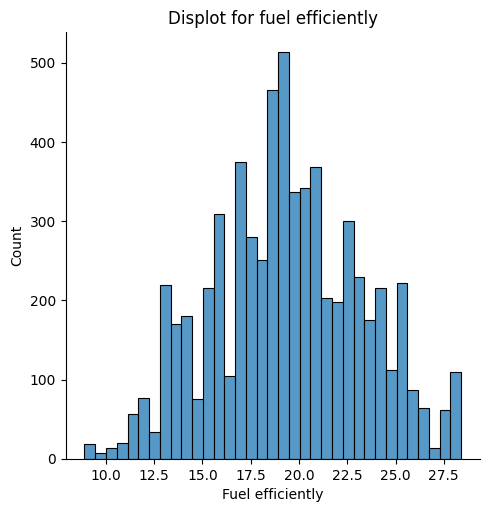

'fuel_eff''s distribution seems to become bell-shaped after removing outliner
Therefore, we will calculate its skewed-value using scipy.stats


In [92]:
# Check distribution for 'fuel_eff'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='fuel_eff')
plt.title('Displot for fuel efficiently')
plt.xlabel('Fuel efficiently')



plt.show()

print('\'fuel_eff\'\'s distribution seems to become bell-shaped after removing outliner')
print('Therefore, we will calculate its skewed-value using scipy.stats')

In [93]:
from scipy.stats import skew

# Calculate skewness 
skew_value = skew(x_train['fuel_eff'])
print('-'*30)
print(f"Skewness of fuel_eff: {round(skew_value, 4)}")
print('-'*30)
print('The skewness is being around 0.0015 which is very close to zero')
print('This suggest that the distribution is nearly normal after we removed its outliner')


------------------------------
Skewness of fuel_eff: 0.0015
------------------------------
The skewness is being around 0.0015 which is very close to zero
This suggest that the distribution is nearly normal after we removed its outliner


#### `'year'`

<Figure size 1600x900 with 0 Axes>

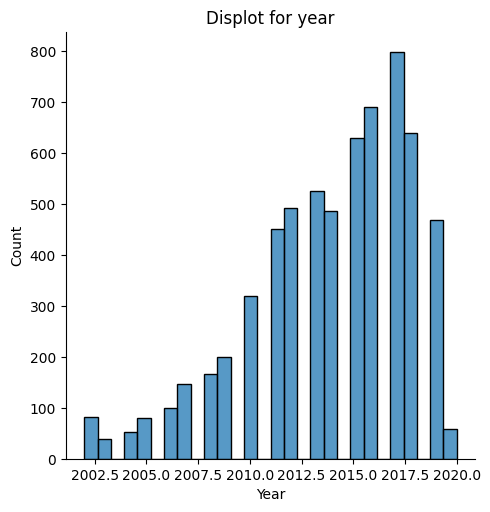

'Year' feature has the left-skewed distribution


In [94]:
# Check distribution for 'year'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='year')
plt.title('Displot for year')
plt.xlabel('Year')



plt.show()

print('\'Year\' feature has the left-skewed distribution')

In [95]:
from scipy.stats import skew

# Calculate skewness 
skew_value = skew(x_train['year'])
print('-'*25)
print(f"Skewness of year: {round(skew_value, 2)}")
print('-'*25)
print('The skewness is being around -0.82 which is highly negative-skewed')
print('This suggest that the distribution is highly left-skewed despite after we removed its outliner')

-------------------------
Skewness of year: -0.82
-------------------------
The skewness is being around -0.82 which is highly negative-skewed
This suggest that the distribution is highly left-skewed despite after we removed its outliner


#### `'max_power'`

<Figure size 1600x900 with 0 Axes>

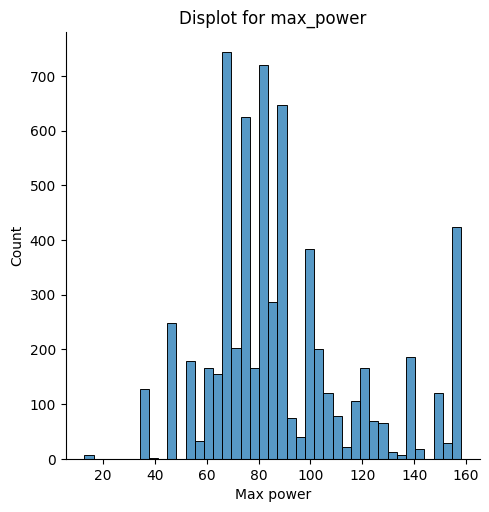

'max_power''s distribution seems to sightly become more bell-shaped after removing outliner
Therefore, we will calculate its skewed-value using scipy.stats


In [97]:
# Check distribution for 'max_power'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='max_power')
plt.title('Displot for max_power')
plt.xlabel('Max power')



plt.show()

print('\'max_power\'\'s distribution seems to sightly become more bell-shaped after removing outliner')
print('Therefore, we will calculate its skewed-value using scipy.stats')

In [98]:
from scipy.stats import skew

# Calculate skewness 
skew_value = skew(x_train['max_power'])
print('-'*30)
print(f"Skewness of max_power: {round(skew_value, 2)}")
print('-'*30)
print('The skewness is being around 0.84 which means the moderate level of positive-skewed')
print('This suggest that the distribution is still skewed to the right despite after we removed its outliner')

------------------------------
Skewness of max_power: 0.84
------------------------------
The skewness is being around 0.84 which means the moderate level of positive-skewed
This suggest that the distribution is still skewed to the right despite after we removed its outliner


<Figure size 1600x900 with 0 Axes>

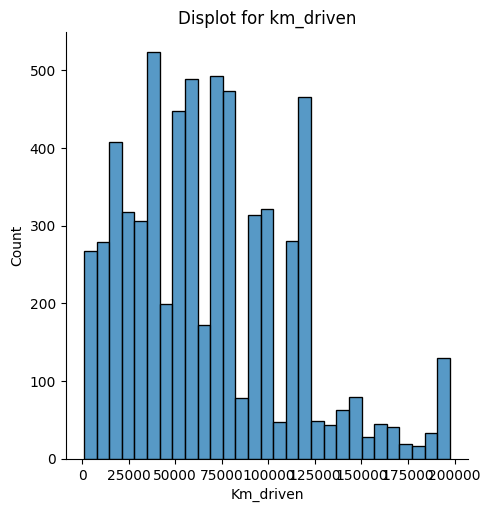

'km_driven' has the right-skewed distribution


In [99]:
# Check the distribution for 'km_driven'
plt.figure(figsize=(16,9))

sns.displot(data=x_train, x='km_driven')
plt.title('Displot for km_driven')
plt.xlabel('Km_driven')



plt.show()

print('\'km_driven\' has the right-skewed distribution')

In [100]:
from scipy.stats import skew

# Calculate skewness 
skew_value = skew(x_train['km_driven'])
print('-'*30)
print(f"Skewness of km_driven: {round(skew_value, 2)}")
print('-'*30)
print('The skewness is being around 0.75 which is highly positive-skewed')
print('This suggest that the distribution is still right-skewed despite after we removed its outliner')

------------------------------
Skewness of km_driven: 0.75
------------------------------
The skewness is being around 0.75 which is highly positive-skewed
This suggest that the distribution is still right-skewed despite after we removed its outliner


#### The distribution summary for the processed trainning dataset
- `'fuel_eff'` has the normal distribution: Skewness of fuel_eff: 0.0015
- `'year'` has the left-skewed distribution: Skewness of year: -0.82
- `'max_power'` has the `right-skewed` distribution: Skewness of max_power: `0.84`
- `'km_driven'` has the `right-skewed` distribution: Skewness of km_driven: `0.75`

### When data is right-skewed distribution, the direct normalization method can distort the data 
- The right-skewed column is: `'max_power'` and `'km_driven'` 
- Use logarithmic transformation to address the skewness before normalizing

In [101]:
# Log transformation for 'max_power' and 'km_driven'
import numpy as np
x_train['max_power'] = np.log1p(x_train['max_power'])  # log(1 + x) to handle 0 values
x_train['km_driven'] = np.log1p(x_train['km_driven'])
x_test['max_power'] = np.log1p(x_test['max_power'])
x_test['km_driven'] = np.log1p(x_test['km_driven'])

In [103]:
# Using 'yeo-johnson' method for power transformation
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

In [104]:
# Transform fuel_eff
x_train['fuel_eff'] = transformer.fit_transform(x_train[['fuel_eff']])
x_test['fuel_eff'] = transformer.transform(x_test[['fuel_eff']])

In [106]:
# Check the summary statistics for both features to confirm the transformations
print(x_train[['fuel_eff', 'year']].describe())
print('-'*120)
print('According to the summary statistics, the \'fuel_eff\', \'year\' column has been successfully transformed and standardized')

           fuel_eff         year
count  6.422000e+03  6422.000000
mean   1.305575e-16  2013.852071
std    1.000078e+00     3.922459
min   -2.746780e+00  2002.000000
25%   -6.667874e-01  2011.000000
50%   -2.110401e-02  2015.000000
75%    6.891503e-01  2017.000000
max    2.295203e+00  2020.000000
------------------------------------------------------------------------------------------------------------------------
According to the summary statistics, the 'fuel_eff', 'year' column has been successfully transformed and standardized


In [107]:
# Scale the 'fuel_eff' and 'year' column with normalization technique
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train[['fuel_eff', 'year']] = scaler.fit_transform(x_train[['fuel_eff', 'year']])
x_test[['fuel_eff', 'year']] = scaler.transform(x_test[['fuel_eff', 'year']])


## 5. Modeling

In [108]:
# Libraries for selected model evaluation

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

### Generate model `algorithms`

In [109]:
# Models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 42), 
              RandomForestRegressor(n_estimators = 100, random_state = 42)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

### Apply `cross-validation`

In [110]:
from sklearn.model_selection import KFold, cross_val_score

# We will evaluate each model with 10-fold cross validation
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

print("Negative MSE:")
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Negative MSE:
Linear Regression - Score: [-0.13853784 -0.14373153 -0.14692503 -0.13110188 -0.14994558 -0.15020465
 -0.14460562 -0.14205701 -0.15033385 -0.1227209 ]; Mean: -0.14201638859021487
SVR - Score: [-0.13537398 -0.14761289 -0.14674373 -0.13295226 -0.15005476 -0.14080446
 -0.14576076 -0.13677348 -0.14864497 -0.12199713]; Mean: -0.14067184189448798
KNeighbors Regressor - Score: [-0.10215228 -0.12009565 -0.12306014 -0.11107581 -0.11552514 -0.10496425
 -0.09759842 -0.10406379 -0.09975694 -0.10349532]; Mean: -0.10817877401313095
Decision-Tree Regressor - Score: [-0.10364862 -0.10607996 -0.10895762 -0.0899793  -0.09602159 -0.09118704
 -0.0760088  -0.08833324 -0.09232992 -0.09212273]; Mean: -0.09446688146013212
Random-Forest Regressor - Score: [-0.05750534 -0.06615293 -0.05938476 -0.05420023 -0.06155197 -0.05602067
 -0.05791934 -0.0557886  -0.05728014 -0.05486083]; Mean: -0.058066480069842476


In [111]:
print("R-Squared:")
for i, model in enumerate(algorithms):
    scores = cross_val_score(model, x_train, y_train, cv=kfold, scoring='r2')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

R-Squared:
Linear Regression - Score: [0.79201696 0.80464418 0.79484296 0.80970595 0.79146086 0.77952803
 0.80878447 0.76473174 0.81096804 0.80312086]; Mean: 0.7959804056439858
SVR - Score: [0.79676677 0.79936875 0.79509613 0.80702012 0.79130902 0.79332573
 0.807257   0.77348208 0.81309165 0.80428199]; Mean: 0.7980999246591535
KNeighbors Regressor - Score: [0.84664159 0.83676941 0.82816642 0.83877373 0.83933163 0.84593236
 0.87094324 0.82765435 0.87456418 0.83396415]; Mean: 0.8442741057264449
Decision-Tree Regressor - Score: [0.84439518 0.85581914 0.84785831 0.86939527 0.86645649 0.8661547
 0.89949172 0.85370657 0.88390302 0.852209  ]; Mean: 0.8639389392305512
Random-Forest Regressor - Score: [0.91366882 0.91008682 0.91707879 0.9213285  0.91439565 0.91777227
 0.92341185 0.9076055  0.92797512 0.91198767]; Mean: 0.9165310980399621


#### `Random-Forest Regressor` has the highest in negative MSE and R-Square, so this model will be selected

- For `Random-Forest Regressor`, the parameters to tune include:
    - `n_estimators`: Number of trees in the forest.
    - `max_depth`: Maximum depth of the tree.
    - `min_samples_split` and `min_samples_leaf`: As with Decision Tree.

In [112]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [23, 25, 27, 29, 32, 35, 39],
    'max_depth': [18, 22, 23, 26],
    'min_samples_split': [6, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Apply GridSearchCV(algorithm, dictionary, cross-validation strategy)
grid = GridSearchCV(model, param_grid, cv=10, refit=True, scoring='neg_mean_squared_error')

# Fit the grid search
grid.fit(x_train, y_train)

# Best parameters
print(grid.best_params_)

# Best score
print(grid.best_score_)

{'bootstrap': True, 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 35}
-0.05757642653527726


In [113]:
x_train.isna().sum()

max_power               0
year                    0
km_driven               0
fuel_eff                0
brand_region_America    0
brand_region_Asia       0
brand_region_Europe     0
dtype: int64

In [114]:
x_test.isna().sum()

max_power               0
year                    0
km_driven               0
fuel_eff                0
brand_region_America    0
brand_region_Asia       0
brand_region_Europe     0
dtype: int64

## 6. Testing

### Evaluate the model

In [115]:
best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test MSE:", mse)
print("Test R-squared:", r2)

Test MSE: 0.051177639064590996
Test R-squared: 0.9281355641886361


In [116]:
# Compared actual and predicted selling prices of our testing set
pd.DataFrame({'actual_price': np.exp(y_test), 'predicted_price': np.exp(y_pred)})

,actual_price,predicted_price
5944,225000.0,226927.362818
6035,900000.0,937762.712830
3069,320000.0,305873.124358
6526,650000.0,511305.449548
322,520000.0,655990.975142
...,...,...
4662,440000.0,445811.823912
2977,700000.0,891148.338944
2459,60000.0,44825.676579
928,750000.0,652093.854763


## 7. Feature importances analysis

In [117]:
# Assign the best model to variable
model = grid.best_estimator_

# Extract features importances
importances = model.feature_importances_

# Sort features by important score
sorted_idx = importances.argsort()  

In [118]:
# Check features name from x_train and importance values
print(x_train.columns)  # Training feature names
print(importances)

Index(['max_power', 'year', 'km_driven', 'fuel_eff', 'brand_region_America',
       'brand_region_Asia', 'brand_region_Europe'],
      dtype='object')
[0.44274058 0.47296887 0.03142793 0.04933725 0.00085788 0.00161538
 0.00105211]


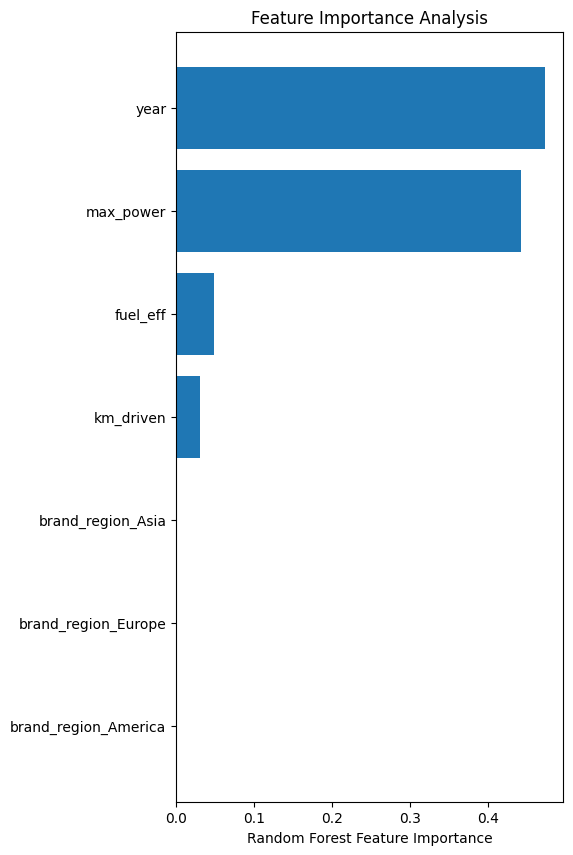

In [119]:
import matplotlib.pyplot as plt

# Sort the feature importances
sorted_idx = importances.argsort()

# Plot
plt.figure(figsize=(5, 10))
plt.barh(x_train.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance Analysis")
plt.show()

## 8. Inference

In [147]:
import pickle
import os

# Define paths
model_path = r'model/car_price_prediction.model'
scaler_path = r'preprocess/scaler.prep'
brandre_enc_path = r'preprocess/brandre_encoder.prep'

In [148]:
# Verify the saved files path
print(f"model_path: {model_path}")
print(f"scaler_path: {scaler_path}")
print(f"brandre_enc_path: {brandre_enc_path}")


model_path: model/car_price_prediction.model
scaler_path: preprocess/scaler.prep
brandre_enc_path: preprocess/brandre_encoder.prep


In [149]:
# Verify the saved files directory
print(f"Model directory: {os.path.dirname(model_path)}")
print(f"Scaler directory: {os.path.dirname(scaler_path)}")
print(f"Brand Encoder directory: {os.path.dirname(brandre_enc_path)}")


Model directory: model
Scaler directory: preprocess
Brand Encoder directory: preprocess


In [150]:
# Ensure directories exist
os.makedirs(os.path.dirname(model_path), exist_ok=True)
os.makedirs(os.path.dirname(scaler_path), exist_ok=True)
os.makedirs(os.path.dirname(brandre_enc_path), exist_ok=True)

In [151]:
# Save objects
pickle.dump(model, open(model_path, 'wb'))  # Save the model
pickle.dump(scaler, open(scaler_path, 'wb'))  # Save the Min/Max Scaler
pickle.dump(brandre_ohe, open(brandre_enc_path, 'wb'))  # Save the brand_region encoder

In [129]:
# Load only the necessary components
model = pickle.load(open(model_path, 'rb'))
scaler = pickle.load(open(scaler_path, 'rb'))
brandre_ohe = pickle.load(open(brandre_enc_path, 'rb'))

In [130]:
# The names of brand_region we have in our 'brandre_ncoder'
brandre_ohe.categories_[0]

array(['America', 'Asia', 'Europe'], dtype=object)

##### `Sample dataframe` to demonstrate real use-case of the model

##### `sample_df`
- Assume that this car has: 
    - low 'max_power'
    - Old manufactured 'year'
    - High 'fuel_eff'
    - Is the European brand

In [131]:
# Define a sample DataFrame with all columns
sample_df = pd.DataFrame([[90, 2012, 3800, 26., 0, 1, 0]],  # Include a value for 'km_driven'
                         columns=['max_power', 'year', 'km_driven', 'fuel_eff',
                                  'brand_region_America', 'brand_region_Asia', 'brand_region_Europe'])


In [132]:
# sample_df['brand_region_America'] = 0  # Adjust the value based on the specific sample

##### `sample_df_2`
- Assume that this car has: 
    - High 'max_power'
    - Modern manufactured 'year'
    - Low 'fuel_eff'
    - Is the Asian brand

In [133]:
# Define a 2nd sample DataFrame with all columns
sample_df_2 = pd.DataFrame([[125, 2019, 40000, 13., 1, 0, 0]],  # Include a value for 'km_driven'
                         columns=['max_power', 'year', 'km_driven', 'fuel_eff',
                                  'brand_region_America', 'brand_region_Asia', 'brand_region_Europe'])

### `Debugging`

In [134]:
x_train.columns

Index(['max_power', 'year', 'km_driven', 'fuel_eff', 'brand_region_America',
       'brand_region_Asia', 'brand_region_Europe'],
      dtype='object')

In [135]:

# scaler.feature_names_in_
# sample_df = sample_df[x.columns]

In [136]:
x.columns

Index(['max_power', 'year', 'km_driven', 'fuel_eff', 'brand_region_America',
       'brand_region_Asia', 'brand_region_Europe'],
      dtype='object')

In [137]:
sample_df.columns

Index(['max_power', 'year', 'km_driven', 'fuel_eff', 'brand_region_America',
       'brand_region_Asia', 'brand_region_Europe'],
      dtype='object')

In [138]:
scaler.feature_names_in_

array(['fuel_eff', 'year'], dtype=object)

#### Process the `sample dataframes`

In [139]:
# Define numerical columns for scaling
num_cols_to_scale = ['fuel_eff', 'year']

# Scale only 'fuel_eff' and 'year' using the scaler
sample_df[num_cols_to_scale] = scaler.transform(sample_df[num_cols_to_scale])

# Ensure the sample_df has the same order of columns as during training
sample_df = sample_df[x.columns]

# Use the sample_df for prediction
y_pred_sample = model.predict(sample_df)
print("Predicted price (log scale):", y_pred_sample[0])
print("Predicted price:", np.exp(y_pred_sample[0]))  # Exponentiate if log-transformed during training


Predicted price (log scale): 13.708996654746754
Predicted price: 898962.5496024766


In [140]:
# Predict using the saved model
prediction = model.predict(sample_df)
print("Predicted Selling Price (Log Scale):", prediction)
predicted_price = np.exp(prediction)  # Convert from log scale to original scale if needed
print("Predicted Selling Price:", predicted_price)

Predicted Selling Price (Log Scale): [13.70899665]
Predicted Selling Price: [898962.54960248]


#### Process the `2nd sample dataframes`

In [141]:
# Define numerical columns for scaling
num_cols_to_scale = ['fuel_eff', 'year']

# Scale only 'fuel_eff' and 'year' using the scaler
sample_df_2[num_cols_to_scale] = scaler.transform(sample_df_2[num_cols_to_scale])

# Ensure the sample_df has the same order of columns as during training
sample_df_2 = sample_df_2[x.columns]

# Use the sample_df for prediction
y_pred_sample = model.predict(sample_df_2)
print("Predicted price (log scale):", y_pred_sample[0])
print("Predicted price:", np.exp(y_pred_sample[0]))  # Exponentiate if log-transformed during training


Predicted price (log scale): 14.32163034311621
Predicted price: 1658842.0274941484


In [142]:
# Predict using the saved model
prediction = model.predict(sample_df)
print("Predicted Selling Price (Log Scale):", prediction)
predicted_price = np.exp(prediction)  # Convert from log scale to original scale if needed
print("Predicted Selling Price:", predicted_price)

Predicted Selling Price (Log Scale): [13.70899665]
Predicted Selling Price: [898962.54960248]


### Car Price Prediction Report
#### Which features significantly impact predictions, and which do not? Why?
According to the correlation matrix and predictive power matrix analysis, we found out that the most important feature to be used in predicting car selling price is `'year'`, followed by `'max_power'`. Nonetheless, other features such as `'km_driven'`, `'fuel_eff'`, and `'brand_regions'` didn't indicate any significant results at all.
The reasons behiend the significant prediction results from `'year'` and `'max_power'` are the displays of high correlation coeifficient from the correlation matrix as well as the high score of predictive power matrix.
- The `'year'` feature has a high correlation coeifficent when compared with other features (0.48) that indicates the correlated changes when the more modern `'year'` the car has been produced with more advanced technologies, stricter safety and emission, and many new features added that could improve the quality of life of the driver. This proved that the `'selling_price'` also has a higher chance to be more expensive.
- The `'max_power'` feature has a high correlation coeifficient when compared with other features (0.75) that indicates the correlated changes when the car with higher limit of `'max_power'` which required more advanced engineering and higher quality components along with the larger and more explosive engines, turbo is produced, the `'seeling_price'` will be eventually increased at the same time. 

#### Which algorithms performed well, and which did not? Why?
After thoroughly optimization for cross validation with 10-kfold method across several algorithms, the results from Random Forest Regressor appeared to has the highest $R^2$ (~0.928) and also with the least $MSE$ (~0.0511)
The most distintive factors that could be considered using `RandomForestRegressor` model for this car price prediction project are:
- Robustness to Nonlinear Relationships and Feature Interactions
    - Random Forest is an ensemble learning method that combines multiple decision trees. Each tree is constructed by splitting the data on features that maximize the reduction in variance (for regression). By aggregating predictions across many trees, Random Forest captures nonlinear patterns and interactions between features effectively.
- Feature Importance and Handling of Mixed Data Types
    - Random Forest can handle datasets with mixed data types (numerical and categorical) effectively by splitting on feature values that minimize variance at each decision node. Moreover, it provides feature importance scores, allowing  to identify the most predictive features in the dataset.
